# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import config
import os

In [2]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# CAG counts

In [14]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0)
clusters

,UniRef90_A0A378A6L7
CAG00001,
CAG00001,UniRef90_A0A2X1RLT4
CAG00001,UniRef90_A0A333FLJ3
CAG00001,UniRef90_V5ADF3
CAG00001,UniRef90_UPI000A3C0D9B
CAG00001,UniRef90_A0A378FSW8
...,...
CAG27816,UniRef90_A0A148HQ34
CAG27817,UniRef90_UPI0002A368F9
CAG27817,UniRef90_A0A2X3M0Q2


In [31]:
counts = clusters.groupby(level=0).count()
counts

,UniRef90_A0A378A6L7
CAG00001,
CAG00001,11641
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG27814,2
CAG27815,2
CAG27816,2


In [40]:
(counts.iloc[:, 0] > 700).sum()

180

Text(0, 0.5, '\\# of genes in CAG (log10)')

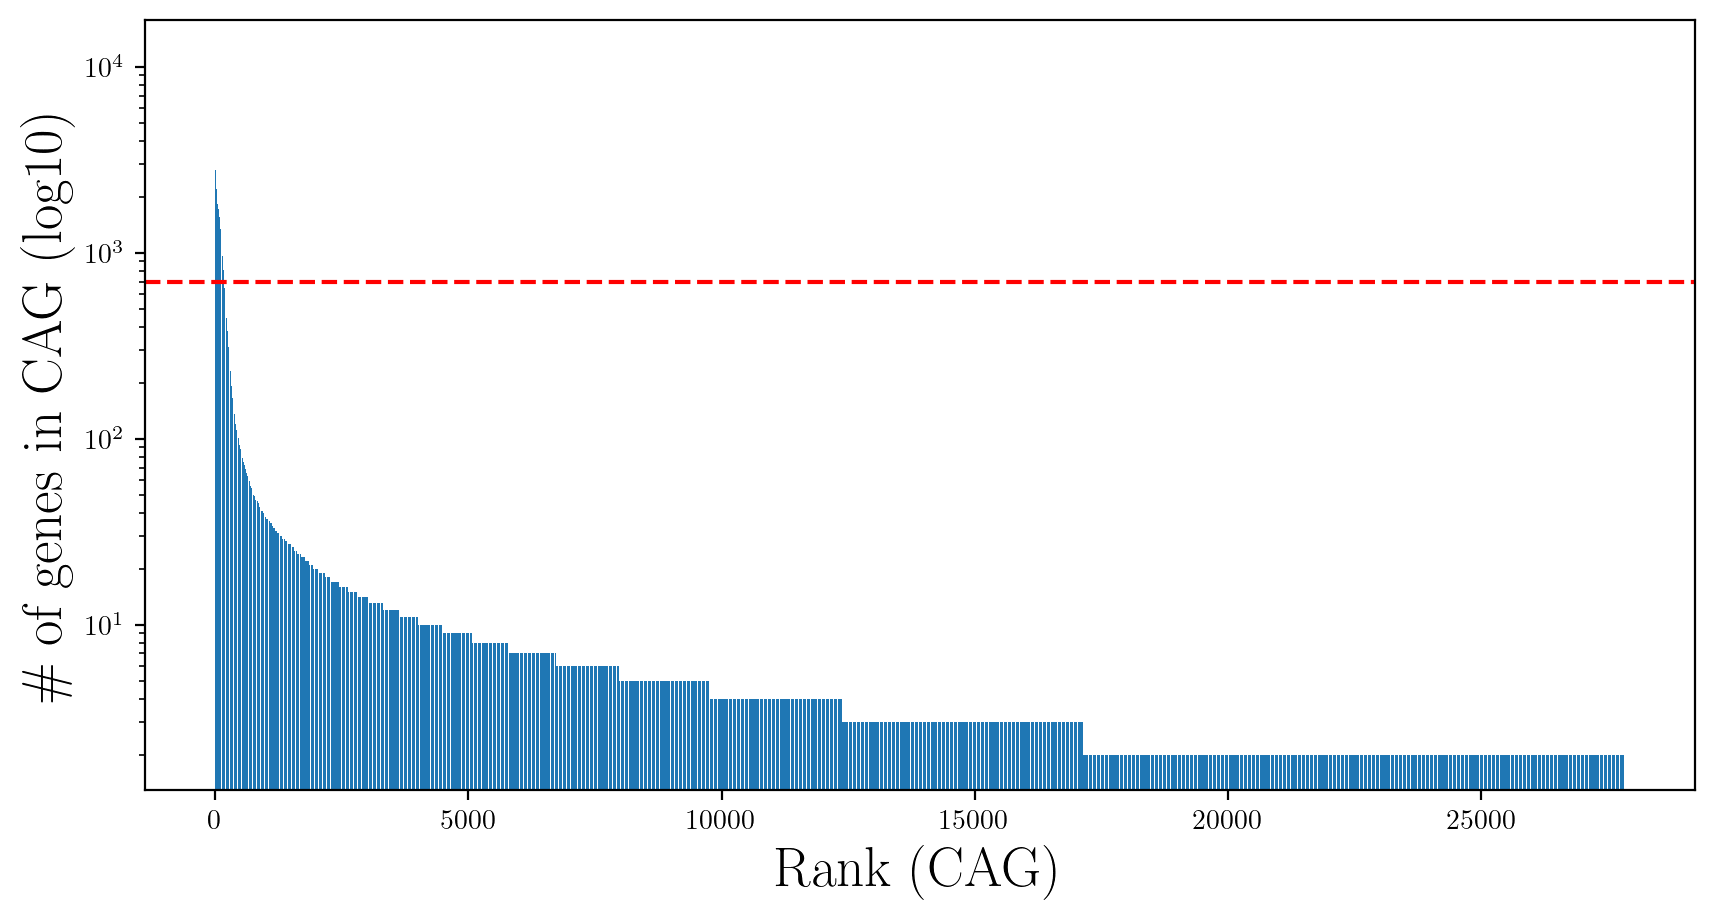

In [36]:
plt.figure(figsize=(10, 5), dpi=200)
num_cags = counts.shape[0]
plt.bar(range(num_cags), counts.values.flatten())
plt.yscale("log")
plt.axhline(y=700, color='r', linestyle='--')
plt.xlabel("Rank (CAG)", fontsize=20)
plt.ylabel("\# of genes in CAG (log10)", fontsize=20)

# profiles

In [42]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t")
metadata

,Sample_ID,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,bos_taurus_read_count,unreduced_gene_richness
0,magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,37,64331.0
1,magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,...,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,30,69105.0
2,magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,13268,21372.0
3,magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,3304,89717.0
4,magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,476,61474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2761,185844.0
3438,magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2339,176610.0
3439,magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,1853,142285.0
3440,magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,...,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641,1694,155385.0


In [43]:
CAG = pd.read_csv(os.path.join(config.RAW_DIR, "profiles_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None).iloc[:, :-1]
CAG.columns = metadata["Sample_ID"]
CAG

Sample_ID,magic.0001,magic.0004,magic.0006,magic.0007,magic.0008,magic.0010,magic.0011,magic.0012,magic.0013,magic.0014,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
0,,,,,,,,,,,,,,,,,,,,,
CAG00001,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00003,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00004,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000010,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000071,0.000000,0.000024,0.000041,0.000015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG27814,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG27815,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000091,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.0,0.0
CAG27816,0.000000,0.000000,0.000000e+00,0.000146,0.000089,0.000000e+00,0.0,0.000238,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


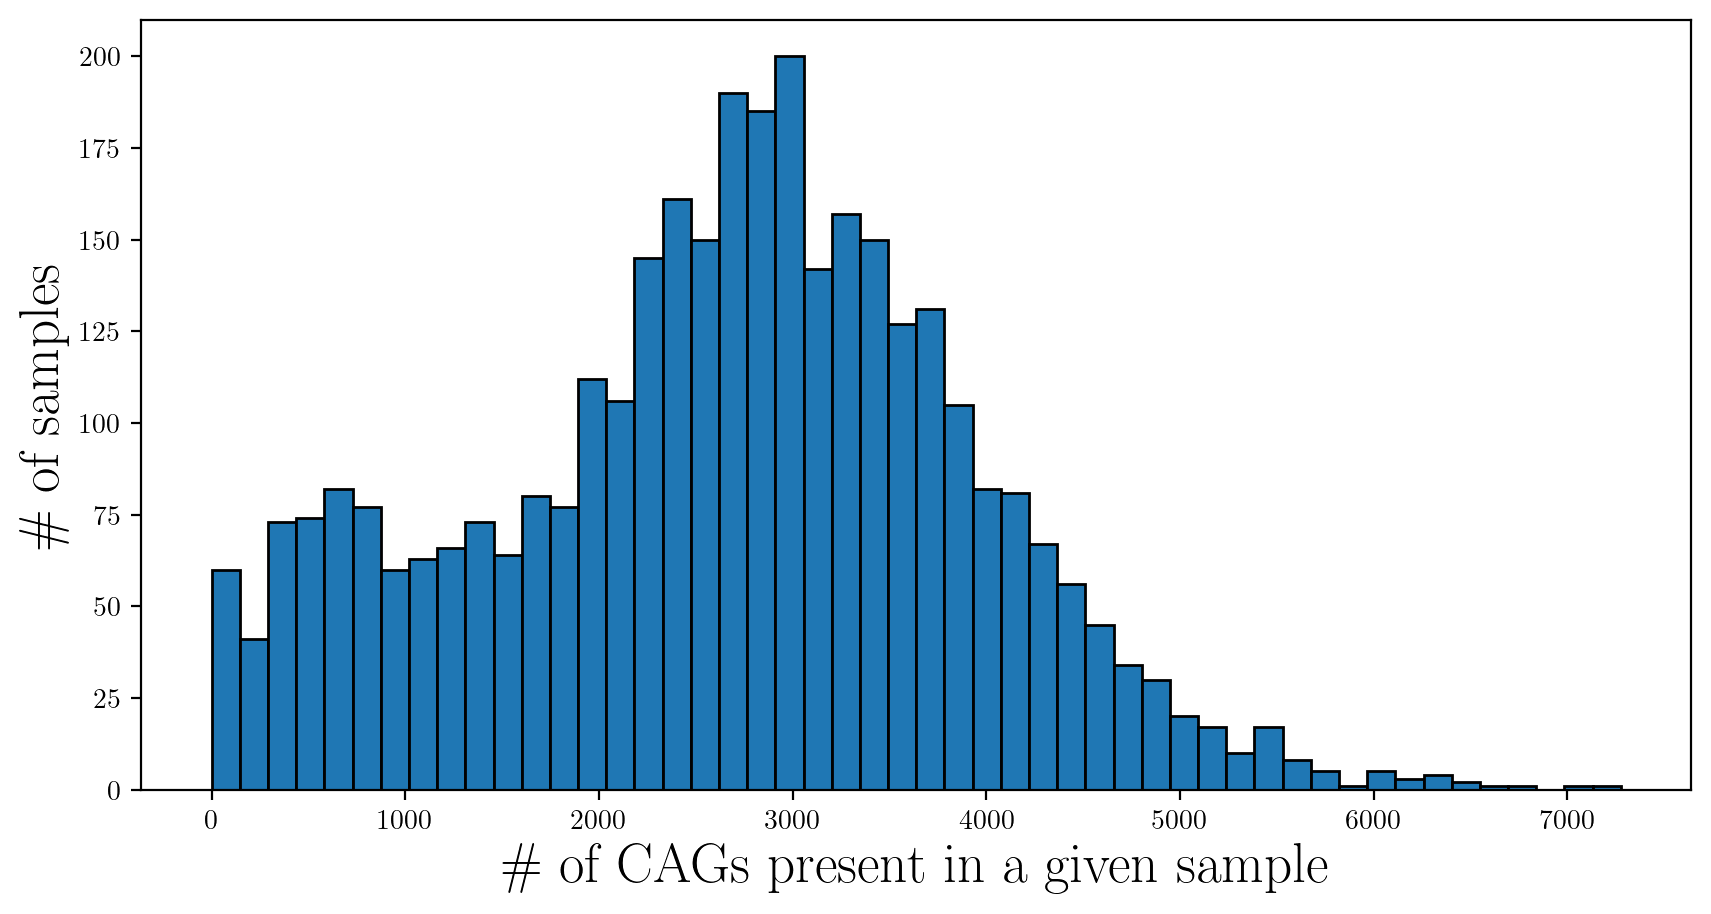

In [44]:
plt.figure(figsize=(10, 5), dpi=200)

CAG_presence = (CAG.T > 0)
counts = CAG_presence.sum(axis=1)

plt.hist(counts, bins=50, edgecolor="black")
plt.xlabel("\# of CAGs present in a given sample", fontsize=20)
plt.ylabel("\# of samples", fontsize=20)

plt.show()

In [54]:
counts = clusters.groupby(level=0).count()
MGS_CAGs = counts[(counts.iloc[:, 0] > 700)].index
nonMGS_CAGs = counts[(counts.iloc[:, 0] <= 700)].index

In [280]:
all_cags = counts.index
all_cags

Index(['CAG00001', 'CAG00002', 'CAG00003', 'CAG00004', 'CAG00005', 'CAG00006',
       'CAG00007', 'CAG00008', 'CAG00009', 'CAG00010',
       ...
       'CAG27809', 'CAG27810', 'CAG27811', 'CAG27812', 'CAG27813', 'CAG27814',
       'CAG27815', 'CAG27816', 'CAG27817', 'CAG27818'],
      dtype='object', name='CAG00001', length=27818)

In [383]:
has_CAG = {c : (CAG.loc[c] > 0).values.flatten() for c in all_cags}
has_CAG

{'CAG00001': array([False, False, False, ..., False, False, False]),
 'CAG00002': array([False, False, False, ..., False, False, False]),
 'CAG00003': array([False, False, False, ..., False, False, False]),
 'CAG00004': array([False, False, False, ..., False, False, False]),
 'CAG00005': array([False, False, False, ...,  True, False, False]),
 'CAG00006': array([False, False, False, ..., False, False, False]),
 'CAG00007': array([False, False, False, ...,  True, False, False]),
 'CAG00008': array([False, False, False, ...,  True, False, False]),
 'CAG00009': array([False, False, False, ..., False, False, False]),
 'CAG00010': array([False, False, False, ...,  True,  True,  True]),
 'CAG00011': array([False, False, False, ...,  True, False, False]),
 'CAG00012': array([False, False, False, ..., False, False, False]),
 'CAG00013': array([False, False, False, ..., False, False, False]),
 'CAG00014': array([False, False, False, ..., False,  True, False]),
 'CAG00015': array([False, False, 

In [384]:
len(has_CAG)

27818

In [303]:
from scipy.stats import fisher_exact
from sklearn.metrics import matthews_corrcoef
from tqdm import tqdm

# curr_MGS = "CAG00001"
# curr_CAG = "CAG00181"

ass_dict = {}

for CAG1 in tqdm(all_cags):
#     print("CAG1", CAG1)
    associated = []
    for CAG2 in all_cags:
        if CAG1 == CAG2: continue

#         has_CAG1 = CAG.loc[CAG1] > 0
#         has_CAG2 = CAG.loc[CAG2] > 0
        has_CAG1 = has_CAG[CAG1]
        has_CAG2 = has_CAG[CAG2]
        
        if (~has_CAG1 & has_CAG2).sum() / has_CAG2.sum() > 0.01: continue

        table = (
            [[(has_CAG1 & has_CAG2).sum(), (~has_CAG1 & has_CAG2).sum()],
             [(has_CAG1 & ~has_CAG2).sum(), (~has_CAG1 & ~has_CAG2).sum()]
            ]
        )
        
        p = fisher_exact(table, "greater").pvalue
        
        adjusted = p

        if adjusted == 0:
            associated.append(CAG2)
            
    ass_dict[CAG1] = associated
#     print("ass", associated)

100%|████████████████████████████████████████████████████████████████████████████████████| 27818/27818 [1:55:20<00:00,  4.02it/s]


In [315]:
import pickle

with open(os.path.join("../output/logs", "association_dict.pkl"), "wb") as f:
    pickle.dump(ass_dict, f)

In [316]:
with open(os.path.join("../output/logs", "association_dict.pkl"), "rb") as f:
    ass = pickle.load(f)
ass

{'CAG00001': ['CAG00233'],
 'CAG00002': [],
 'CAG00003': ['CAG00283', 'CAG00356', 'CAG00415', 'CAG00494', 'CAG02387'],
 'CAG00004': [],
 'CAG00005': ['CAG00569'],
 'CAG00006': [],
 'CAG00007': [],
 'CAG00008': [],
 'CAG00009': ['CAG00171',
  'CAG00378',
  'CAG00397',
  'CAG00406',
  'CAG00407',
  'CAG00566'],
 'CAG00010': ['CAG00515',
  'CAG00872',
  'CAG01248',
  'CAG01456',
  'CAG01992',
  'CAG02499',
  'CAG02863',
  'CAG04028',
  'CAG05836',
  'CAG06927',
  'CAG07148',
  'CAG08913',
  'CAG09304',
  'CAG12753',
  'CAG13191',
  'CAG13442',
  'CAG13619',
  'CAG15547',
  'CAG15739',
  'CAG15960',
  'CAG16687'],
 'CAG00011': ['CAG00379', 'CAG00414'],
 'CAG00012': [],
 'CAG00013': [],
 'CAG00014': ['CAG00405', 'CAG01333', 'CAG03338', 'CAG13876', 'CAG15417'],
 'CAG00015': [],
 'CAG00016': [],
 'CAG00017': [],
 'CAG00018': [],
 'CAG00019': ['CAG00001',
  'CAG00209',
  'CAG00233',
  'CAG00274',
  'CAG00466',
  'CAG00487',
  'CAG00621',
  'CAG01032'],
 'CAG00020': [],
 'CAG00021': [],
 'CAG00

In [319]:
for key in ass_dict:
    if ass_dict[key] == []: continue
    print(key)

CAG00001
CAG00003
CAG00005
CAG00009
CAG00010
CAG00011
CAG00014
CAG00019
CAG00023
CAG00024
CAG00028
CAG00031
CAG00040
CAG00043
CAG00046
CAG00047
CAG00059
CAG00060
CAG00069
CAG00077
CAG00082
CAG00085
CAG00098
CAG00103
CAG00107
CAG00112
CAG00129
CAG00139
CAG00140
CAG00151
CAG00153
CAG00159
CAG00161
CAG00164
CAG00170
CAG00171
CAG00173
CAG00189
CAG00191
CAG00195
CAG00199
CAG00200
CAG00206
CAG00214
CAG00216
CAG00218
CAG00223
CAG00230
CAG00233
CAG00234
CAG00238
CAG00242
CAG00243
CAG00249
CAG00254
CAG00256
CAG00260
CAG00262
CAG00263
CAG00271
CAG00272
CAG00277
CAG00278
CAG00281
CAG00284
CAG00296
CAG00299
CAG00302
CAG00304
CAG00307
CAG00318
CAG00322
CAG00327
CAG00343
CAG00346
CAG00347
CAG00350
CAG00361
CAG00370
CAG00371
CAG00372
CAG00383
CAG00388
CAG00394
CAG00397
CAG00401
CAG00405
CAG00409
CAG00410
CAG00440
CAG00442
CAG00445
CAG00456
CAG00462
CAG00466
CAG00487
CAG00505
CAG00515
CAG00525
CAG00526
CAG00537
CAG00541
CAG00553
CAG00580
CAG00582
CAG00587
CAG00592
CAG00598
CAG00607
CAG00618
CAG00619
C

In [341]:
in_graph = []
relationships = []

for key in ass_dict:
    if ass_dict[key] == []:
        continue
    in_graph.append(key)
    in_graph = in_graph + ass_dict[key]
    for rel in ass_dict[key]:
        relationships.append(rel)
    
len(set(in_graph)), len(relationships)

(1239, 2691)

In [356]:
counts.loc["CAG00001"]

UniRef90_A0A378A6L7    11641
Name: CAG00001, dtype: int64

In [368]:
import networkx as nx 

G = nx.DiGraph()

for node in set(in_graph):
    G.add_node(node, color=("orange" if int(counts.loc[node]) > 700 else "steelblue"))
    
for key in ass_dict:
    if ass_dict[key] == []: continue
    for rel in ass_dict[key]:
        G.add_edge(rel, key)

In [369]:
G.number_of_edges()

2691

In [370]:
from pyvis.network import Network

net = Network(notebook=True, directed=True)

net.from_nx(G)

net.show("example.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [373]:
curr_MGS = "CAG00003"
curr_CAG = "CAG00283"

In [374]:
has_MGS = CAG.loc[curr_MGS] > 0
has_CAG = CAG.loc[curr_CAG] > 0

table = pd.DataFrame(
    [
        [(has_MGS & has_CAG).sum(), (~has_MGS & has_CAG).sum()],
        [(has_MGS & ~has_CAG).sum(), (~has_MGS & ~has_CAG).sum()]
    ],
#     [
#         [100, 0],
#         [0, 100],
#     ],
    columns=["has_MGS", "no_MGS"],
    index=["has_CAG", "no_CAG"]
)

print(fisher_exact(table, "greater").pvalue)

0.0


In [375]:
table

,has_MGS,no_MGS
has_CAG,409,2
no_CAG,155,2876


In [376]:
df = CAG.loc[[curr_MGS, curr_CAG]].T.sort_values(curr_MGS)

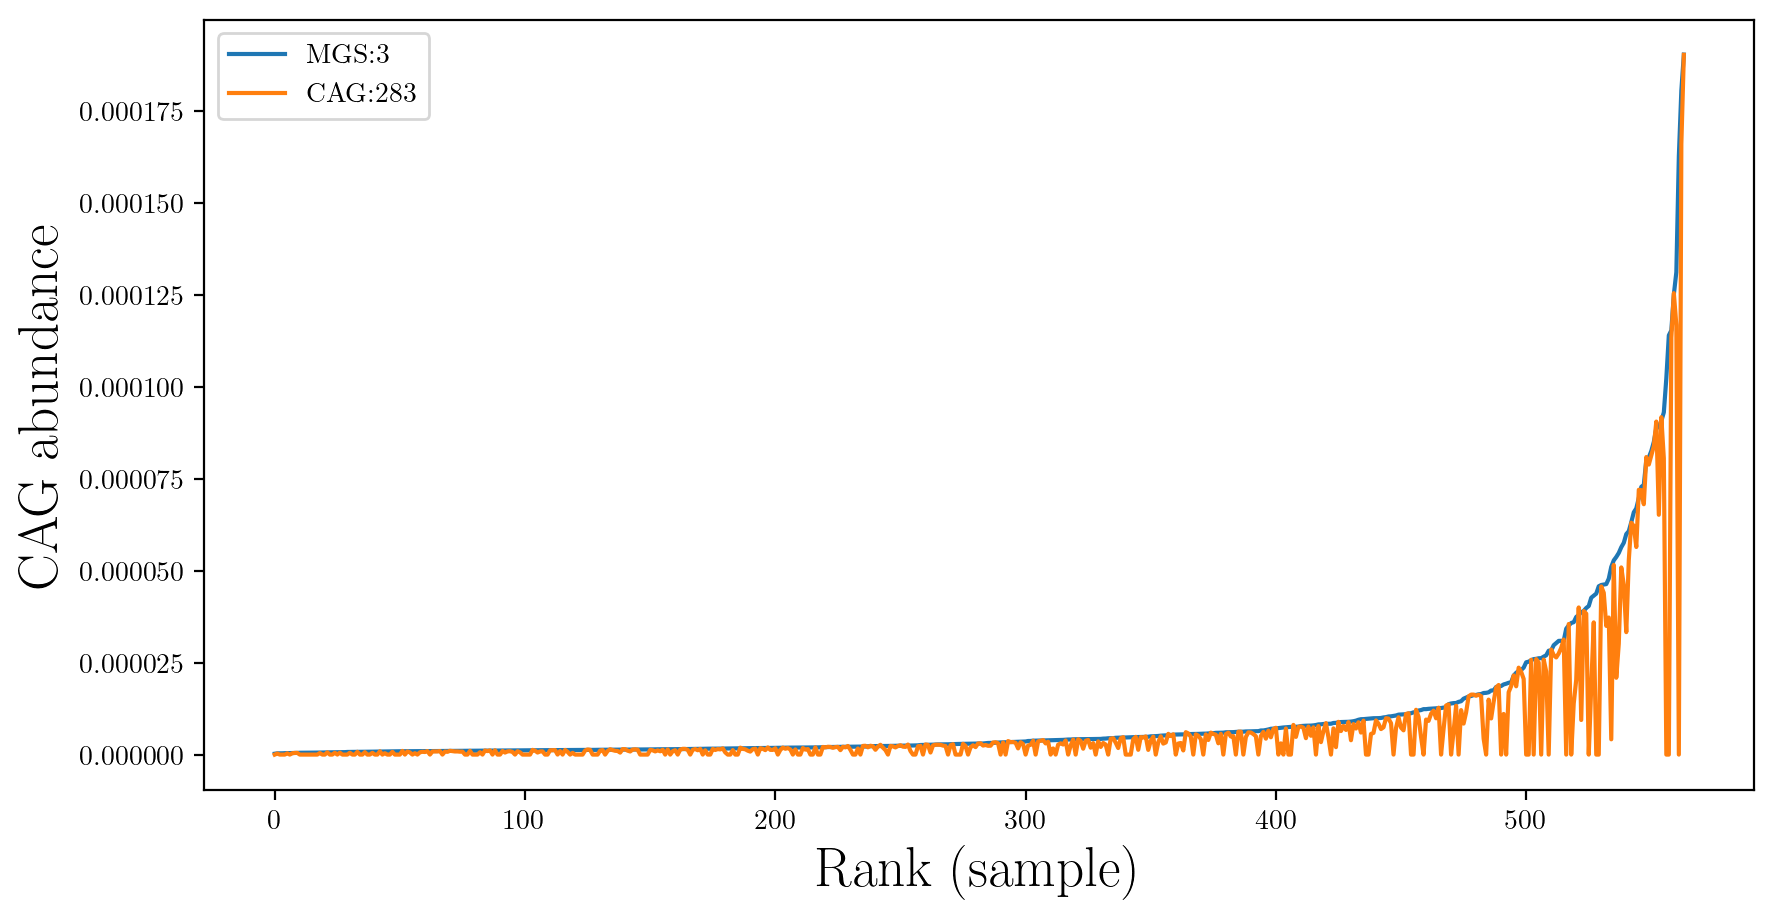

In [377]:
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(df[df[curr_MGS] > 0][curr_MGS].values, label="MGS:3")
plt.plot(df[df[curr_MGS] > 0][curr_CAG].values, label="CAG:283")
plt.xlabel("Rank (sample)", fontsize=20)
plt.ylabel("CAG abundance", fontsize=20)
plt.legend()
plt.show()

# Find antagonistic relationships between CAGs that are dependent on the same host CAG

In [379]:
ass_dict

{'CAG00001': ['CAG00233'],
 'CAG00002': [],
 'CAG00003': ['CAG00283', 'CAG00356', 'CAG00415', 'CAG00494', 'CAG02387'],
 'CAG00004': [],
 'CAG00005': ['CAG00569'],
 'CAG00006': [],
 'CAG00007': [],
 'CAG00008': [],
 'CAG00009': ['CAG00171',
  'CAG00378',
  'CAG00397',
  'CAG00406',
  'CAG00407',
  'CAG00566'],
 'CAG00010': ['CAG00515',
  'CAG00872',
  'CAG01248',
  'CAG01456',
  'CAG01992',
  'CAG02499',
  'CAG02863',
  'CAG04028',
  'CAG05836',
  'CAG06927',
  'CAG07148',
  'CAG08913',
  'CAG09304',
  'CAG12753',
  'CAG13191',
  'CAG13442',
  'CAG13619',
  'CAG15547',
  'CAG15739',
  'CAG15960',
  'CAG16687'],
 'CAG00011': ['CAG00379', 'CAG00414'],
 'CAG00012': [],
 'CAG00013': [],
 'CAG00014': ['CAG00405', 'CAG01333', 'CAG03338', 'CAG13876', 'CAG15417'],
 'CAG00015': [],
 'CAG00016': [],
 'CAG00017': [],
 'CAG00018': [],
 'CAG00019': ['CAG00001',
  'CAG00209',
  'CAG00233',
  'CAG00274',
  'CAG00466',
  'CAG00487',
  'CAG00621',
  'CAG01032'],
 'CAG00020': [],
 'CAG00021': [],
 'CAG00

In [385]:
has_CAG

{'CAG00001': array([False, False, False, ..., False, False, False]),
 'CAG00002': array([False, False, False, ..., False, False, False]),
 'CAG00003': array([False, False, False, ..., False, False, False]),
 'CAG00004': array([False, False, False, ..., False, False, False]),
 'CAG00005': array([False, False, False, ...,  True, False, False]),
 'CAG00006': array([False, False, False, ..., False, False, False]),
 'CAG00007': array([False, False, False, ...,  True, False, False]),
 'CAG00008': array([False, False, False, ...,  True, False, False]),
 'CAG00009': array([False, False, False, ..., False, False, False]),
 'CAG00010': array([False, False, False, ...,  True,  True,  True]),
 'CAG00011': array([False, False, False, ...,  True, False, False]),
 'CAG00012': array([False, False, False, ..., False, False, False]),
 'CAG00013': array([False, False, False, ..., False, False, False]),
 'CAG00014': array([False, False, False, ..., False,  True, False]),
 'CAG00015': array([False, False, 

In [391]:
from sklearn.metrics import matthews_corrcoef

antagonistic = []

for d1 in tqdm(all_cags):
    for d2 in all_cags:
        if d1 == d2: continue
        has_CAG1 = has_CAG[d1]
        has_CAG2 = has_CAG[d2]
        coef = matthews_corrcoef(has_CAG1, has_CAG2)
        if coef < 0:
            antagonistic.append({"d1" : d1, "d2" : d2, "coef" : coef})

  0%|                                                                                      | 2/27818 [01:34<364:31:41, 47.18s/it]


KeyboardInterrupt: 

In [392]:
antagonistic

[{'d1': 'CAG00001', 'd2': 'CAG00004', 'coef': -0.03683474700542305},
 {'d1': 'CAG00001', 'd2': 'CAG00005', 'coef': -0.08262254610329377},
 {'d1': 'CAG00001', 'd2': 'CAG00007', 'coef': -0.059026920971721915},
 {'d1': 'CAG00001', 'd2': 'CAG00008', 'coef': -0.04175040269174622},
 {'d1': 'CAG00001', 'd2': 'CAG00010', 'coef': -0.08276713249608156},
 {'d1': 'CAG00001', 'd2': 'CAG00011', 'coef': -0.091360584199872},
 {'d1': 'CAG00001', 'd2': 'CAG00014', 'coef': -0.09563559186164883},
 {'d1': 'CAG00001', 'd2': 'CAG00016', 'coef': -0.07500835962332239},
 {'d1': 'CAG00001', 'd2': 'CAG00017', 'coef': -0.05280114095693935},
 {'d1': 'CAG00001', 'd2': 'CAG00018', 'coef': -0.04042729236779826},
 {'d1': 'CAG00001', 'd2': 'CAG00023', 'coef': -0.09810604897165401},
 {'d1': 'CAG00001', 'd2': 'CAG00024', 'coef': -0.09729793525466485},
 {'d1': 'CAG00001', 'd2': 'CAG00025', 'coef': -0.037147858063245644},
 {'d1': 'CAG00001', 'd2': 'CAG00027', 'coef': -0.04956001607027727},
 {'d1': 'CAG00001', 'd2': 'CAG0002

In [395]:
sorted(antagonistic, key=lambda x : x["coef"])

[{'d1': 'CAG00001', 'd2': 'CAG13947', 'coef': -0.18840770108996774},
 {'d1': 'CAG00003', 'd2': 'CAG00304', 'coef': -0.1809426344506613},
 {'d1': 'CAG00003', 'd2': 'CAG05594', 'coef': -0.1792334560865064},
 {'d1': 'CAG00003', 'd2': 'CAG16958', 'coef': -0.17510076780021328},
 {'d1': 'CAG00003', 'd2': 'CAG07096', 'coef': -0.17486935430807515},
 {'d1': 'CAG00003', 'd2': 'CAG01655', 'coef': -0.1736605897078583},
 {'d1': 'CAG00003', 'd2': 'CAG15710', 'coef': -0.17350744182700945},
 {'d1': 'CAG00003', 'd2': 'CAG02541', 'coef': -0.1667991084795764},
 {'d1': 'CAG00001', 'd2': 'CAG09743', 'coef': -0.1655775906694435},
 {'d1': 'CAG00003', 'd2': 'CAG16971', 'coef': -0.16448674498256433},
 {'d1': 'CAG00001', 'd2': 'CAG16585', 'coef': -0.1638731153925135},
 {'d1': 'CAG00003', 'd2': 'CAG07440', 'coef': -0.16335355080685682},
 {'d1': 'CAG00003', 'd2': 'CAG08801', 'coef': -0.1602248351238176},
 {'d1': 'CAG00003', 'd2': 'CAG00673', 'coef': -0.15997909187248824},
 {'d1': 'CAG00001', 'd2': 'CAG06083', 'co